# Лабораторная работа №5.

Вариант 20

## Задание 1

In [3]:
Variant<-20
set.seed(Variant) 
m<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu)
  {current<-lambda; 
   lambda<-mu; 
   mu<-current}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu)
  {current<-nu; 
   nu<-gamma; 
   gamma<-current}
if (sample(c(0:1),1)) 
{k<-sample(c(4:7),1)} else {k<-"inf"}
t<-runif(1)
print("--------------")
View(data.frame(lambda, mu, nu, gamma, k, m, t))

[1] "--------------"


lambda    mu        nu        gamma    k   m t         
1 0.2789631 0.7685332 0.5291637 0.962907 inf 9 0.09133259

### Теоретически

Построим граф состояний, пусть

$S_0$ - пустой сервер, очереди нет

$S_1$ - сервер занят, очереди нет

$S_2$ - сервер занят, очередь 1

$\cdots$

$S_m$ - сервер занят, очередь m-1

$S_{m+1}$ - сервер занят, очередь m - заполнена


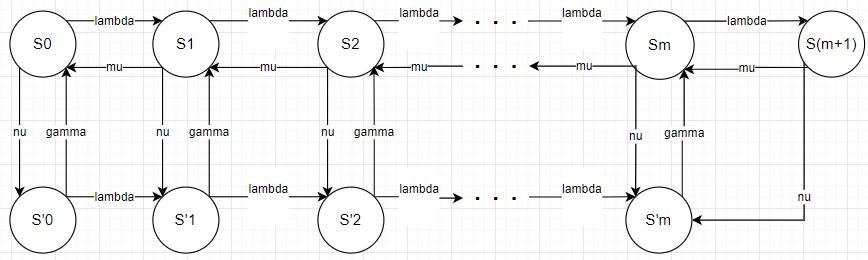

$$\frac{dP_0(t)}{dt}=\mu P_1(t) - \lambda P_0(t) + \gamma P'_0(t) - \nu P_0(t) \\

\frac{dP_i(t)}{dt}=\lambda P_{i-1}(t) + \gamma P'_i(t) + \mu P_{i+1}(t) - (\mu + \nu + \lambda) \cdot P_i(t), \quad \quad 1 \leq i \leq m \\

\frac{dP_{m+1}(t)}{dt}=\lambda P_{m}(t) - \mu P_{m+1}(t) - \nu P_{m+1}(t) $$


$$ \underline{\hspace{ 12 cm}} $$


$$ \frac{dP'_0(t)}{dt}=\nu P_0(t) - \gamma P'_0(t) - \lambda P'_0(t) \\

\frac{dP'_i(t)}{dt}=\lambda P'_{i-1}(t) + \nu P_i(t) - (\gamma + \lambda) \cdot P'_i(t) , \quad \quad 1 \leq i \leq m - 1 \\

\frac{dP'_m(t)}{dt}=\lambda P'_{m-1}(t) + \nu P_m(t) -\gamma P'_m(t) + \nu P_{m+1}(t) $$

Уравнение нормировки:

$$\sum_{i=0}^{28}P_i(t) = 1$$

Найдем финальные вероятности:

```c
λ:0.2789631$;
η:0.7685332$;
ν:0.5291637$;
γ:0.962907$;

sol: rk([
        η*P1 - λ*P0 + γ*P_0 - ν*P0,
        λ*P0 + γ*P_1 + η*P2 - (η + ν + λ)*P1,
        λ*P1 + γ*P_2 + η*P3 - (η + ν + λ)*P2,
        λ*P2 + γ*P_3 + η*P4 - (η + ν + λ)*P3,
        λ*P3 + γ*P_4 + η*P5 - (η + ν + λ)*P4,
        λ*P4 + γ*P_5 + η*P6 - (η + ν + λ)*P5,
        λ*P5 + γ*P_6 + η*P7 - (η + ν + λ)*P6,
        λ*P6 + γ*P_7 + η*P8 - (η + ν + λ)*P7,
        λ*P7 + γ*P_8 + η*P9 - (η + ν + λ)*P8,
        λ*P8 + γ*P_9 + η*P10 - (η + ν + λ)*P9,
        λ*P9 - η*P10 - ν*P10,
        
        ν*P0 - γ*P_0 - λ*P_0,
        λ*P_0 + ν*P1 - (γ + λ)*P_1,
        λ*P_1 + ν*P2 - (γ + λ)*P_2,
        λ*P_2 + ν*P3 - (γ + λ)*P_3,
        λ*P_3 + ν*P4 - (γ + λ)*P_4,
        λ*P_4 + ν*P5 - (γ + λ)*P_5,
        λ*P_5 + ν*P6 - (γ + λ)*P_6,
        λ*P_6 + ν*P7 - (γ + λ)*P_7,
        λ*P_7 + ν*P8 - (γ + λ)*P_8,
        λ*P_8 + ν*P9 + ν*P10 - γ*P_9
    ], [
        P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
        P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8, P_9
    ], [
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ], [
        t, 0, 30, 0.02
    ])$
```

```c
plot2d([[discrete, makelist([p[1], p[2]], p, sol)], [discrete, [[t, 0], [t, 0.31]]]], [xlabel, "t"], [ylabel, "P1"]);
```

последние точки, рассчитанные максимой

```c
makelist(
    last(makelist(p[i], p, sol)),
    i,
    2,
    22
);
```

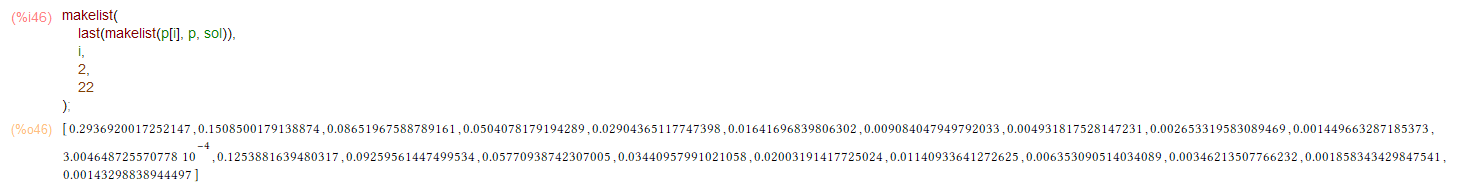

In [4]:
P0 <- 0.2936920017252147
P <- c(
  0.1508500179138874,0.08651967588789161,0.0504078179194289,0.02904365117747398,0.01641696839806302,0.009084047949792033,0.004931817528147231,0.002653319583089469,0.001449663287185373,3.004648725570778*10^-4,0.1253881639480317,0.09259561447499534,0.05770938742307005,0.03440957991021058,0.02003191417725024,0.01140933641272625,0.006353090514034089,0.00346213507766232,0.001858343429847541,0.00143298838944497
)
i <- seq(1, 2*m+2, 1)
P0 + sum(P[i])  # Проверка

[1] 1

Найдем вероятности при $t = 0.09133259$:

```c
t:0.09133259$
sol: rk([
        η*P1 - λ*P0 + γ*P_0 - ν*P0,
        λ*P0 + γ*P_1 + η*P2 - (η + ν + λ)*P1,
        λ*P1 + γ*P_2 + η*P3 - (η + ν + λ)*P2,
        λ*P2 + γ*P_3 + η*P4 - (η + ν + λ)*P3,
        λ*P3 + γ*P_4 + η*P5 - (η + ν + λ)*P4,
        λ*P4 + γ*P_5 + η*P6 - (η + ν + λ)*P5,
        λ*P5 + γ*P_6 + η*P7 - (η + ν + λ)*P6,
        λ*P6 + γ*P_7 + η*P8 - (η + ν + λ)*P7,
        λ*P7 + γ*P_8 + η*P9 - (η + ν + λ)*P8,
        λ*P8 + γ*P_9 + η*P10 - (η + ν + λ)*P9,
        λ*P9 - η*P10 - ν*P10,
        
        ν*P0 - γ*P_0 - λ*P_0,
        λ*P_0 + ν*P1 - (γ + λ)*P_1,
        λ*P_1 + ν*P2 - (γ + λ)*P_2,
        λ*P_2 + ν*P3 - (γ + λ)*P_3,
        λ*P_3 + ν*P4 - (γ + λ)*P_4,
        λ*P_4 + ν*P5 - (γ + λ)*P_5,
        λ*P_5 + ν*P6 - (γ + λ)*P_6,
        λ*P_6 + ν*P7 - (γ + λ)*P_7,
        λ*P_7 + ν*P8 - (γ + λ)*P_8,
        λ*P_8 + ν*P9 + ν*P10 - γ*P_9
    ], [
        P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,
        P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8, P_9
    ], [
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ], [
        x, 0, t, 0.02
    ])$
makelist(
    last(makelist(p[i], p, sol)),
    i,
    2,
    22
);
```

Вероятность простоя:
$$P_{\text простоя} = P_0(t)$$

Вероятность образования очереди:
$$P_{\text О} = \sum_{i = 2}^{m+1}(P_i(t) + P'_{i}(t))$$

Абсолютная пропускная способность:
$$λ' = λ \cdot (1 - P_{m+1}(t) - P'_{m}(t))$$

Средняя длина очереди:
$$L_{оч} = \sum_{i = 2}^{m+1}(i - 1)\cdot(P_i(t) + P'_{i}(t))$$

Среднее время нахождения в очереди:
$$W_{оч} = \frac{L_{оч}}{λ'}$$

Среднее число заявок в системе:
$$L_{сист} = \sum_{i = 1}^{m+1}i \cdot P_i(t) + \sum_{i = m+3}^{2m+2}(i - m-2) \cdot P_{i}(t)$$

Среднее время нахождения заявок в системе:
$$T_{сист} = \frac{L_{сист}}{λ'}$$

In [5]:
P_prost = P0

i_sq <- seq(2, m+1, 1)
P_O = sum(P[i_sq] + P[i_sq + m+1])

lambda_abs <- lambda * (1 - P[m+1] - P[2*m+2])

L_o <- sum((i_sq - 1) * (P[i_sq] + P[i_sq + m+1]))

W_o <- L_o / lambda_abs

i_sq <- seq(1, m+1, 1); j_sq <- seq(m+3, 2*m+2, 1)
L_c <- sum(i_sq * P[i_sq]) + sum((j_sq - m - 2) * P[j_sq])

T_c <- L_c / lambda_abs

View(data.frame(P_prost, P_O, lambda_abs, L_o, W_o, L_c, T_c))

P_prost  P_O       lambda_abs L_o       W_o      L_c      T_c     
1 0.293692 0.4300698 0.2784796  0.9865546 3.542646 1.338212 4.805423

### Экспериментально

In [6]:
n <- 1000000


lambda_t <- vector("numeric", n)
ready_t <- vector("numeric", n)
queue_in_t <- vector("numeric", n)
queue_out_t <- vector("numeric", n)
passed_t <- vector("numeric", n)

server_taken_t <- vector("numeric", n)
server_done_t <- vector("numeric", n)

lambda_t[1] <- rexp(1, lambda)
for (i in 2:n) {
  lambda_t[i] <- lambda_t[i - 1] + rexp(1, lambda)
}


broken_t <- rexp(1, nu)
repaired_t <- broken_t + rexp(1, gamma)
queue_len <- 0
queue_num <- 0
canceled_num <- 0
taken_num <- 0
done_num <- 0
qlen_sum <- 0
real_q_num <- 0
free_num <- 0
oo_num <- 0
pogreshnost <- 0
for (t in lambda_t) {

  # Active request handling
  if (taken_num > done_num) {
    start_t <- server_taken_t[taken_num]
    end_t <- server_done_t[taken_num]

    if (t >= broken_t && end_t >= broken_t) {
      done_num <- done_num + 1
      passed_t[done_num] <- broken_t
      server_done_t[done_num] <- repaired_t
      
      if (queue_len == m) {
        canceled_num <- canceled_num + 1
      } else {
        queue_num <- queue_num + 1
        queue_in_t[queue_num] <- broken_t
        queue_len <- queue_len + 1
      }
    } else if (t > end_t) {
      done_num <- done_num + 1
      passed_t[done_num] <- end_t
    }
  }

  # Queue handling
  while (done_num == taken_num && queue_len > 0) {
    if (done_num == 0) {
      start_t <- repaired_t
    } else {
      start_t <- server_done_t[done_num]
    }
    if (start_t >= t) {
      break
    }
    queue_pos <- queue_num - queue_len + 1

    start_t <- max(queue_in_t[queue_pos], start_t)
    while (start_t >= repaired_t) {  # Update broken/repair time
      broken_t <- repaired_t + rexp(1, nu)
      repaired_t <- broken_t + rexp(1, gamma)
    }
    if (start_t >= broken_t && start_t <= repaired_t) {
      pogreshnost <- pogreshnost + repaired_t - broken_t
      if (repaired_t < t)
        start_t <- repaired_t
      else
        break
    }
    
    queue_len <- queue_len - 1

    taken_num <- taken_num + 1
    ready_t[taken_num] <- queue_in_t[queue_pos]
    queue_out_t[taken_num] <- start_t
    server_taken_t[taken_num] <- start_t
    end_t <- start_t + rexp(1, mu)
    server_done_t[taken_num] <- end_t
    
    if (t >= broken_t && end_t >= broken_t) {
      done_num <- done_num + 1
      passed_t[done_num] <- broken_t
      server_done_t[done_num] <- repaired_t
      
      if (queue_len == m) {
        canceled_num <- canceled_num + 1
      } else {
        queue_num <- queue_num + 1
        queue_in_t[queue_num] <- broken_t
        queue_len <- queue_len + 1
      }
    } else if (t > end_t) {
      done_num <- done_num + 1
      passed_t[done_num] <- end_t
    }

  }

  qlen_sum <- qlen_sum + queue_len
  if (queue_len == 0) {
    oo_num <- oo_num + 1
  }

  # Current request handling
  if (done_num == taken_num) {
    start_t <- t
    while (start_t >= repaired_t) {  # Update broken/repair time
      broken_t <- repaired_t + rexp(1, nu)
      repaired_t <- broken_t + rexp(1, gamma)
    }
    if (start_t >= broken_t && start_t <= repaired_t) {

      if (queue_len == m) {
        canceled_num <- canceled_num + 1
      } else {
        queue_num <- queue_num + 1
        queue_in_t[queue_num] <- start_t
        queue_len <- queue_len + 1
      }
    } else {
      free_num <- free_num + 1
      taken_num <- taken_num + 1
      ready_t[taken_num] <- start_t
      queue_out_t[taken_num] <- start_t
      server_taken_t[taken_num] <- start_t
      end_t <- start_t + rexp(1, mu)
      server_done_t[taken_num] <- end_t
    }
    
  } else {

    real_q_num <- real_q_num + 1
    if (queue_len == m) {
        canceled_num <- canceled_num + 1
    } else {
      queue_num <- queue_num + 1
      queue_in_t[queue_num] <- t
      queue_len <- queue_len + 1
    }
  }

}

In [7]:
P_prost <- free_num / n

P_O <- 1 - oo_num / n

lambda_abs <- (n - canceled_num) / passed_t[done_num]

L_o <- qlen_sum / n

s <- 0
for (i in 1:done_num) {
  s <- s + queue_out_t[i] - ready_t[i]
}
W_o <- (s - pogreshnost) / n

s <- 0
for (i in 1:done_num) {
  s <- s + passed_t[i] - ready_t[i]
}
L_c <- s / passed_t[done_num]

s <- 0
for (i in 1:done_num) {
  s <- passed_t[i] - ready_t[i] + s
}
T_c <- s / n

View(data.frame(P_prost, P_O, lambda_abs, L_o, W_o, L_c, T_c))

P_prost  P_O      lambda_abs L_o      W_o      L_c      T_c     
1 0.283301 0.449013 0.277728   1.107036 3.863669 1.467272 5.261127